# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Aprilia Dela Safitri
- **Email:** apriliasafitri42016@gmail.com
- **ID Dicoding:** apriliads123

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah sewa sepeda per jam?
- Apakah terdapat pola penggunaan sepeda yang berbeda antara hari kerja (workingday) dan hari libur (holiday)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### Gathering Data

#### Menilai tabel day_df

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memuat tabel hour

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


pada kode diatas untuk memeriksa tipe data pada day_df. dan dapat dilihat bahwa jumlah data dalam day_df sudah lengkap, artinya tidak ada missing value. Namun, terdapat kesalahan dalam tipe data untuk kolom dteday. Kolom tersebut seharusnya dalam format datetime, bukan object (yang merepresentasikan tipe data string).

berikut untuk memeriksa missing value pada day_df

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Seperti yang telah dijelaskan sebelumnya tidak terdapat missing value pada day_df. selanjutnya dilakukan pemeriksaan duplicate data dan ringkasan parameter statistik pada day_df.

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terdapat duplikasi data dan keanehan pada day_df. namun, untuk kolom tahun, bulan dan season perlu diubah dari kode-kode manjadi label masing-masing.

#### Menilai tabel hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


pada kode diatas untuk memeriksa tipe data pada hour_df. dan dapat dilihat bahwa jumlah data dalam hour_df sudah lengkap, artinya tidak ada missing value. Namun, terdapat kesalahan dalam tipe data untuk kolom dteday. Kolom tersebut seharusnya dalam format datetime, bukan object (yang merepresentasikan tipe data string).

berikut untuk memeriksa missing value pada hour_df.

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Seperti yang telah dijelaskan sebelumnya tidak terdapat missing value pada hour_df. selanjutnya dilakukan pemeriksaan duplicate data dan ringkasan parameter statistik pada hour_df.

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat duplikasi data dan keanehan pada hour_df.

### Cleaning Data

#### Membersihkan Data day_df

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday. Untuk mengatasi masalah ini, perlu dilakukan penggantian tipe data pada kolom dteday menjadi datetime. 

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Mengubah masing-masing kode musim, tahun dan bulan.

In [13]:
season_map_day = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_map_day)

In [14]:
year_map_day = {0: '2011', 1: '2012'}
day_df['yr'] = day_df['yr'].map(year_map_day)

In [15]:
month_map_day = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
day_df['mnth'] = day_df['mnth'].map(month_map_day)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
#Periksa kembali menggunakan method info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan Data hour_df

Sama halnya seperti day_df, berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday. Untuk mengatasi masalah ini, perlu dilakukan penggantian tipe data pada kolom dteday menjadi datetime.

In [17]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [18]:
## Ubah kode musim menjadi label musim
season_map_hour = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_map_hour)

In [19]:
# Ubah kode tahun menjadi label tahun
year_map_hour = {0: '2011', 1: '2012'}
hour_df['yr'] = hour_df['yr'].map(year_map_hour)

In [20]:
# Ubah kode bulan menjadi label bulan
month_map_hour = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
hour_df['mnth'] = hour_df['mnth'].map(month_map_hour)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
#Periksa kembali menggunakan method info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [22]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [23]:
#Berikut ini untuk melihat demografi berdasarkan musim:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"],
})

cnt                                
         max   min         mean          std
season                                      
Fall    8714  1115  5644.303191  1459.800381
Spring  7836   431  2604.132597  1399.942119
Summer  8362   795  4992.331522  1695.977235
Winter  8555    22  4728.162921  1699.615261

Dari hasil tersebut dapat diketahui bahwa penyewaan sepeda paling tinggi terdapat pada musim gugur dengan minimal 1115 dan maksimal 8714.

In [24]:
#Berikut ini untuk melihat demografi berdasarkan musim dan tahun:
day_pivot_season_year = pd.pivot_table(day_df, index=['season', 'yr'], values='cnt', aggfunc='mean')
day_pivot_season_year

cnt
season yr               
Fall   2011  4464.361702
       2012  6824.244681
Spring 2011  1666.666667
       2012  3531.296703
Summer 2011  3775.173913
       2012  6209.489130
Winter 2011  3664.460674
       2012  5791.865169

dari hasil di atas dapat dilihat bahwa pada tahun 2012 penyewaan sepeda mengalami  peningkatan rata-rata disetiap musimnya.

In [25]:
#Berikut ini untuk melihat berdasarkan bulan:
day_pivot_month = pd.pivot_table(day_df, index='mnth', values='cnt', aggfunc=['mean'])
day_pivot_month

,mean
,cnt
mnth,
April,4484.900000
August,5664.419355
December,3403.806452
February,2655.298246
January,2176.338710
July,5563.677419
June,5772.366667
March,3692.258065


pada hasil tersebut menunjukkan jika pada bulan Juni memiliki rata-rata penyewaan sepeda tertinggi sebanyak 5772,367.

### Explore Data hour_df

In [26]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [27]:
hour_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"],
})

cnt                            
        max min        mean         std
season                                 
Fall    977   1  236.016237  197.711630
Spring  801   1  111.114569  119.224010
Summer  957   1  208.344069  188.362473
Winter  967   1  198.868856  182.967972

In [28]:
hourly_rentals = hour_df.groupby(['yr', 'hr'])['cnt'].sum().reset_index()
hourly_rentals

,yr,hr,cnt
0,2011,0,15540
1,2011,1,9558
2,2011,2,6661
3,2011,3,3441
4,2011,4,1817
5,2011,5,5157
6,2011,6,20801
7,2011,7,56930
8,2011,8,95467
9,2011,9,59486


In [29]:
hour_pivot_season_year = pd.pivot_table(hour_df, index=['season', 'yr'], values='cnt', aggfunc='mean')
hour_pivot_season_year

cnt
season yr              
Fall   2011  187.343750
       2012  284.343528
Spring 2011   72.533849
       2012  147.814167
Summer 2011  157.655924
       2012  258.963282
Winter 2011  152.828960
       2012  245.698761

In [30]:
day_df.to_csv("day_data.csv", index=False)

In [31]:
hour_df.to_csv("hour_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: 
Bagaimana pengaruh musim terhadap jumlah sewa sepeda per jam?

In [32]:
# Hitung rata-rata jumlah sewa sepeda per jam untuk setiap musim
seasonal_hourly_rentals = hour_df.groupby(['season', 'hr'])['cnt'].mean().reset_index()
seasonal_hourly_rentals

,season,hr,cnt
0,Fall,0,73.914439
1,Fall,1,43.720430
2,Fall,2,30.731183
3,Fall,3,15.752688
4,Fall,4,8.240642
...,...,...,...
91,Winter,19,297.033898
92,Winter,20,212.141243
93,Winter,21,161.327684
94,Winter,22,123.564972


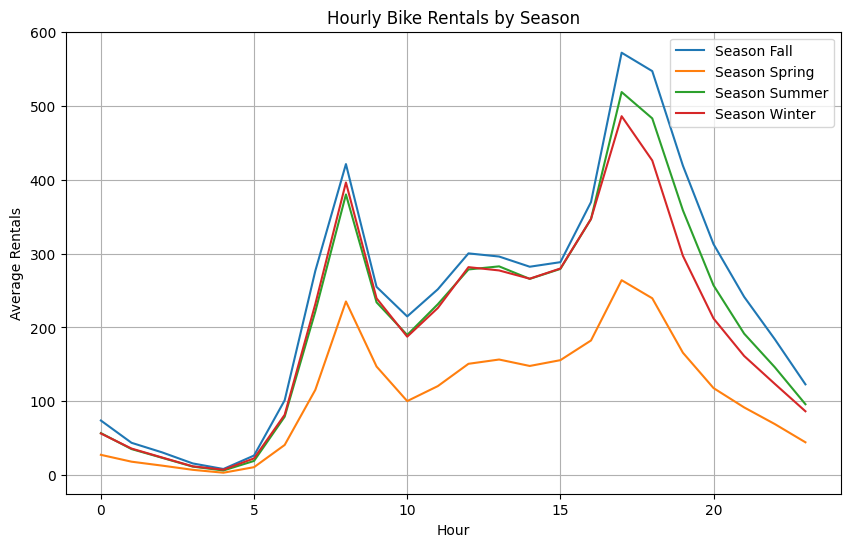

In [33]:
plt.figure(figsize=(10, 6))
for season in seasonal_hourly_rentals['season'].unique():
    season_data = seasonal_hourly_rentals[seasonal_hourly_rentals['season'] == season]
    plt.plot(season_data['hr'], season_data['cnt'], label='Season {}'.format(season))
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.title('Hourly Bike Rentals by Season')
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2: 
Apakah terdapat pola penggunaan sepeda yang berbeda antara hari kerja (workingday) dan hari libur (holiday)?

In [34]:
# Hitung rata-rata penyewaan sepeda per hari kerja dan hari libur untuk setiap tahun
daily_rentals = day_df.groupby(['yr', 'workingday'])['cnt'].mean().reset_index()

# Ubah kode workingday menjadi label
workingday_mapping = {0: 'Holiday', 1: 'Working Day'}
daily_rentals['workingday'] = daily_rentals['workingday'].map(workingday_mapping)

# Buat pivot table
pivot_daily_rentals = daily_rentals.pivot(index='yr', columns='workingday', values='cnt')
pivot_daily_rentals

workingday,Holiday,Working Day
yr,,
2011,3363.817391,3425.056
2012,5288.189655,5744.584


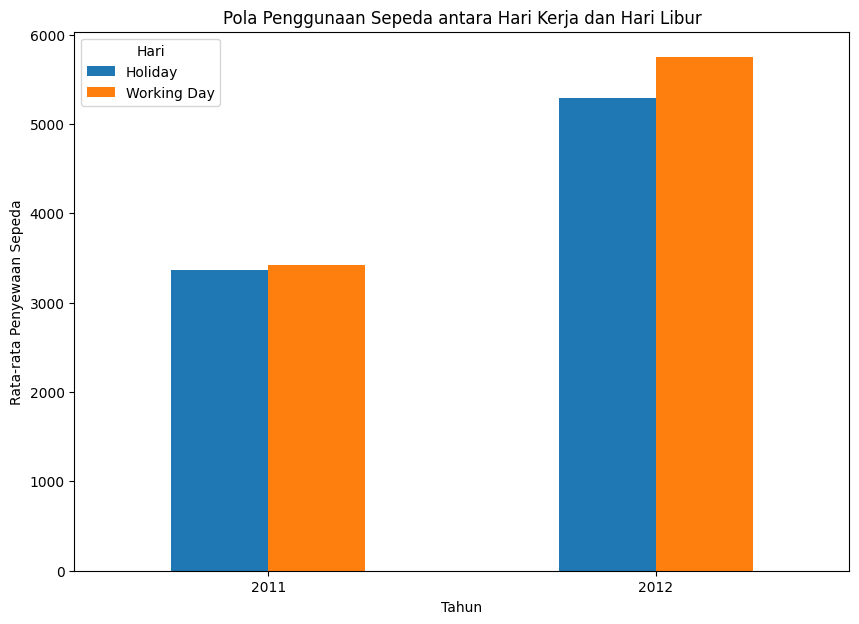

In [35]:
pivot_daily_rentals.plot(kind='bar', figsize=(10, 7))
plt.title('Pola Penggunaan Sepeda antara Hari Kerja dan Hari Libur')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=0)
plt.legend(title='Hari')
plt.show()

## Conclusion

- Conclution pertanyaan 1:
Bagaimana pengaruh musim terhadap jumlah sewa sepeda per jam?

dari hasil visualisasi yang ditampilkan, dapat dilihat bahwa terdapat pengaruh dari musim terhadap penyewaan sepeda setiap jam nya, dimana pada musim gugur penyewaan sepeda mencapai jumlah tertinggi, sedangkan pada musim semi penyewaan sepeda mengalami jumlah terendah pada setiap jamnya. hal ini dapat disebabkan karena musim semi mungkin memiliki cuaca yang lebih tidak menentu, dengan periode hujan atau suhu yang belum stabil, yang dapat mengurangi minat orang untuk bersepeda. sedangkan untuk musim panas dan musim dingin memiliki selisih jumlah penyewaan yang tidak terlalu banyak.

- Conclution pertanyaan 2:
Apakah terdapat pola penggunaan sepeda yang berbeda antara hari kerja (workingday) dan hari libur (holiday)?

dapat dilihat pada hasil visualisasi, bahwa terdapat perbedaan antara hari kerja dengan hari libur, dimana hari kerja memiliki jumlah penyewaan sepeda yang lebih banyak dari pada hari libur meskipun dengan selisih yang tidak begitu banyak. hal ini dapat disebabkan karena orang-orang cenderung memiliki rutinitas harian seperti pergi ke kantor, sekolah, atau melakukan aktivitas lain yang memerlukan transportasi, termasuk menggunakan sepeda pada hari kerja. Sebaliknya, orang-orang mungkin lebih cenderung untuk bersantai di rumah atau melakukan aktivitas rekreasi yang tidak melibatkan penggunaan sepeda pada hari libur.